In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_checkerboard
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

datasets = [make_moons(noise=0.3, random_state=0)
            ,make_circles(noise=0.2, factor=0.5, random_state=1)
            ,make_blobs()
           ]

In [3]:
names = ["Decision Tree","Random Forest", "ExtraTrees"]
# Creating a Python List with our three Tree classifiers
treeclassifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    ExtraTreesClassifier()]

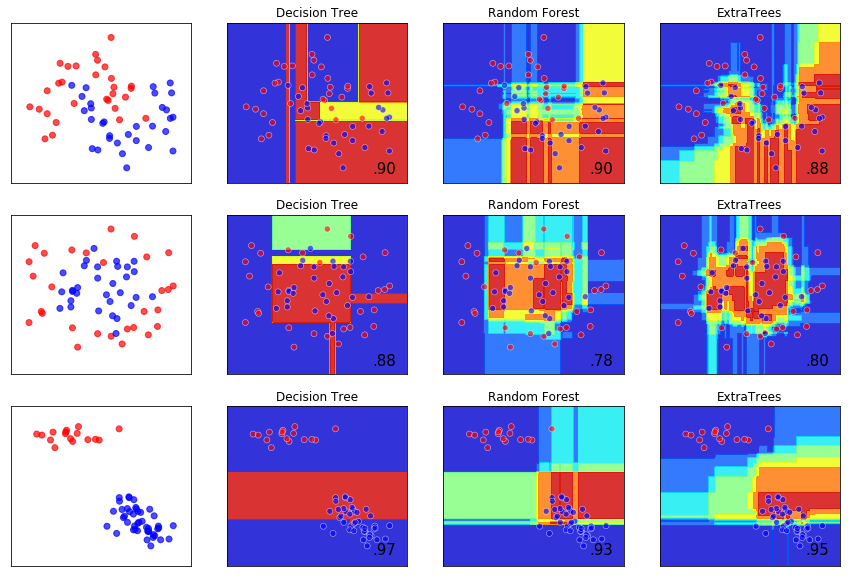

In [4]:
figure = plt.figure(figsize=(12, 10))
h = 0.02
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.jet
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(treeclassifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
    # and testing points
    #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, treeclassifiers):
        ax = plt.subplot(len(datasets), len(treeclassifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
        # and testing points
        #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   #alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [5]:
linearclassifiers = [
    SVC(kernel="linear", C=0.025),
    LogisticRegression(),
    GaussianNB()]

In [6]:
datasets = [make_moons(noise=0.3, random_state=0)
            ,make_circles(noise=0.2, factor=0.5, random_state=1) 
            ,make_circles(noise=0.01, factor=0.5, random_state=1) 
           ]

In [7]:
import os
os.chdir('/home/tapas/keras_multiclass/')

In [8]:
iris = pd.read_csv('Iris.csv')
iris.head(3)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa

In [9]:
target_map = {'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2 }
# Use the pandas apply method to numerically encode our attrition target variable
iris['Species'] = iris['Species'].apply(lambda x: target_map[x])

In [10]:
del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.
               
y = iris.Species
h = .02  # step size in the mesh

X = StandardScaler().fit_transform(X)


# Train two Random Forests. One with normal reasonable parameters and the other with overfitting
trees = RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0)
trees.fit(X, y)

trees_overfit = RandomForestClassifier(max_depth=50, n_estimators=5, random_state=0)
trees_overfit.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

Z = trees.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))

fig = tools.make_subplots(rows=1, cols=2,
                          subplot_titles=("Random Forest (Depth = 4)",
                                          "Random Forest (Depth = 50)")
                         )

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=False)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
                  
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# transform grid using ExtraTreesClassifier
# y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = trees_overfit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)
    fig['layout'][y].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)

py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [11]:
del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.        
y = iris.Species
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)

# Implement 3 Logistic Regression models with varying values of C
clf = LogisticRegression(C=0.01)
clf.fit(X, y)

clf2 = LogisticRegression(C=1)
clf2.fit(X, y)

clf3 = LogisticRegression(C=100)
clf3.fit(X, y)

# Define our usual decision surface bounding plots
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

In [12]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=True)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=0.01)',
    hovermode= 'closest',
    showlegend= False)
    
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)       
py.iplot(fig)


Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=1)',
    hovermode= 'closest',
    showlegend= False)

data = [trace3, trace4]
fig2 = go.Figure(data=data,layout= layout)   

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)
    fig['layout'][y].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)

py.iplot(fig2)

del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.        
y = iris.Species
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)

Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


trace5 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace6 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=100)',
    hovermode= 'closest',
    showlegend= False)

data = [trace5, trace6]
fig3 = go.Figure(data=data,layout= layout)   

py.iplot(fig3)

In [13]:
del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.        
y = iris.Species
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)


# Train two Random Forests. One with normal reasonable parameters and the other with overfitting
clf = SVC(gamma=2, C=1, probability=True)
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,:1]
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))

fig = tools.make_subplots(rows=1, cols=2,
                          subplot_titles=("Class 1 surface probability",
                                          "Class 2 surface probability")
                         )

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Jet',
                  showscale=False)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Jet',
                                line=dict(color='black', width=1))
                    )
                  
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# transform grid using ExtraTreesClassifier
# y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1:2]
Z = Z.reshape(xx.shape)


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Jet',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Jet',
                                line=dict(color='black', width=1))
                   )
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)
    fig['layout'][y].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)

py.iplot(fig)


del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.        
y = iris.Species
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)


Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,2:3]
Z = Z.reshape(xx.shape)


trace5 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Jet',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Jet',
                                reversescale = 'True',
                                line=dict(color='black', width=1))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Class 3 Surface Probability',
    hovermode= 'closest',
    showlegend= False)

data = [trace5, trace4]
fig3 = go.Figure(data=data,layout= layout)   


py.iplot(fig3)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
